In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flipkart-fasion-products-dataset/output.xlsx
/kaggle/input/flipkart-fasion-products-dataset/flipkart_fashion_products_dataset.json


In [2]:
df = pd.read_excel('/kaggle/input/flipkart-fasion-products-dataset/output.xlsx')
df.head()

,Unnamed: 0,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
0,0,fa8e22d6-c0b6-5229-bb9e-ad52eda39a0a,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:51",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EA7H5FYZH,"[{'Style Code': '1005COMBO2'}, {'Closure': 'El...",Shyam Enterprises,921,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
1,1,893e6980-f2a0-531f-b056-34dd63fe912c,"1,499",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",66% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EJZV2UVRZ,"[{'Style Code': '1005BLUE'}, {'Closure': 'Draw...",Shyam Enterprises,499,Bottomwear,Solid Men Blue Track Pants,https://www.flipkart.com/yorker-solid-men-blue...
2,2,eb4c8eab-8206-59d0-bcd1-a724d96bf74f,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:52",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EHFCY5Z4Y,"[{'Style Code': '1005COMBO4'}, {'Closure': 'El...",Shyam Enterprises,931,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
3,3,3f3f97bb-5faf-57df-a9ff-1af24e2b1045,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",69% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9ESZZ7YWEF,"[{'Style Code': '1005COMBO3'}, {'Closure': 'El...",Shyam Enterprises,911,Bottomwear,Solid Men Multicolor Track Pants,https://www.flipkart.com/yorker-solid-men-mult...
4,4,750caa3d-6264-53ca-8ce1-94118a1d8951,"2,999",3.9,York,Clothing and Accessories,"02/10/2021, 20:11:53",68% off,Yorker trackpants made from 100% rich combed c...,['https://rukminim1.flixcart.com/image/128/128...,False,TKPFCZ9EVXKBSUD7,"[{'Style Code': '1005COMBO1'}, {'Closure': 'Dr...",Shyam Enterprises,943,Bottomwear,"Solid Men Brown, Grey Track Pants",https://www.flipkart.com/yorker-solid-men-brow...


In [3]:
df.shape

(30000, 18)

In [4]:
df.describe()

,Unnamed: 0,average_rating
count,30000.000000,27554.000000
mean,14999.500000,3.641972
std,8660.398374,0.664232
min,0.000000,1.000000
25%,7499.750000,3.300000
50%,14999.500000,3.800000
75%,22499.250000,4.100000
max,29999.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30000 non-null  int64  
 1   _id              30000 non-null  object 
 2   actual_price     29137 non-null  object 
 3   average_rating   27554 non-null  float64
 4   brand            27932 non-null  object 
 5   category         30000 non-null  object 
 6   crawled_at       30000 non-null  object 
 7   description      29059 non-null  object 
 8   discount         18017 non-null  object 
 9   images           30000 non-null  object 
 10  out_of_stock     30000 non-null  bool   
 11  pid              30000 non-null  object 
 12  product_details  30000 non-null  object 
 13  seller           28259 non-null  object 
 14  selling_price    29998 non-null  object 
 15  sub_category     30000 non-null  object 
 16  title            30000 non-null  object 
 17  url         

In [6]:
df.dtypes

Unnamed: 0           int64
_id                 object
actual_price        object
average_rating     float64
brand               object
category            object
crawled_at          object
description         object
discount            object
images              object
out_of_stock          bool
pid                 object
product_details     object
seller              object
selling_price       object
sub_category        object
title               object
url                 object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0             0
_id                    0
actual_price         863
average_rating      2446
brand               2068
category               0
crawled_at             0
description          941
discount           11983
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1741
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['brand'].value_counts()

ARBO         999
Pu           996
True Bl      996
REEB         996
ECKO Unl     993
            ... 
Modenti        1
PIS            1
Indian M       1
RV CREATI      1
KRV            1
Name: brand, Length: 324, dtype: int64

In [10]:
df['category'].value_counts()

Clothing and Accessories    28971
Footwear                      987
Bags, Wallets & Belts          41
Toys                            1
Name: category, dtype: int64

In [11]:
df['out_of_stock'].value_counts()

False    28258
True      1742
Name: out_of_stock, dtype: int64

In [12]:
df['description'].value_counts()

60% off    2335
50% off    2164
35% off    1154
63% off    1017
57% off     888
           ... 
83% off       9
84% off       8
86% off       2
87% off       1
85% off       1
Name: description, Length: 87, dtype: int64

In [13]:
df['sub_category'].value_counts()

Topwear                                 16575
Bottomwear                               3862
Winter Wear                              2753
Innerwear and Swimwear                   1774
Clothing Accessories                     1760
Kurtas, Ethnic Sets and Bottoms          1248
Men's Footwear                            987
Fabrics                                   535
Blazers, Waistcoats and Suits             136
Sleepwear                                 122
Tracksuits                                 90
Raincoats                                  34
Uber Urban Clothing and Accessories        28
Inspire Clothing and Accessories           23
Sunshopping Bags, Wallets & Belts          21
Crocks Club Clothing and Accessories       15
Roy Clothing and Accessories               12
SUNSHOPPING Bags, Wallets & Belts          10
INSPIRE Clothing and Accessories            4
Winsome Deal Bags, Wallets & Belts          4
YOFAMA Bags, Wallets & Belts                4
Party Supplies                    

In [14]:
df['seller'].value_counts()

RetailNet                                                                                         1615
ARBOR                                                                                              976
SandSMarketing                                                                                     927
BioworldMerchandising                                                                              846
Keoti                                                                                              668
                                                                                                  ... 
HR HOUSE                                                                                             1
Foot Fetish4.3Seller changed. Check for any changes in pricing and related informatio                1
Tayab Manch Fashions4.3Seller changed. Check for any changes in pricing and related informatio       1
Indiathebestdeals3.2Seller changed. Check for any changes in pricing and 

In [15]:
df['title'].value_counts()

Printed Men Round Neck Black T-Shirt                               856
Printed Men Round Neck White T-Shirt                               703
Slides                                                             556
Full Sleeve Solid Men Sweatshirt                                   519
Printed Men Round Neck Blue T-Shirt                                363
                                                                  ... 
Men Slim Fit Printed Mandarin Collar Formal Shirt                    1
Printed Single Breasted Formal Men Full Sleeve Blazer  (Black)       1
3 Piece Solid Men Suit                                               1
Slim Fit Men Blue Linen Blend Trousers                               1
Checkered Single Breasted Casual Men Full Sleeve Blazer  (Grey)      1
Name: title, Length: 4579, dtype: int64

Text(0.5, 1.0, 'Out of Stock')

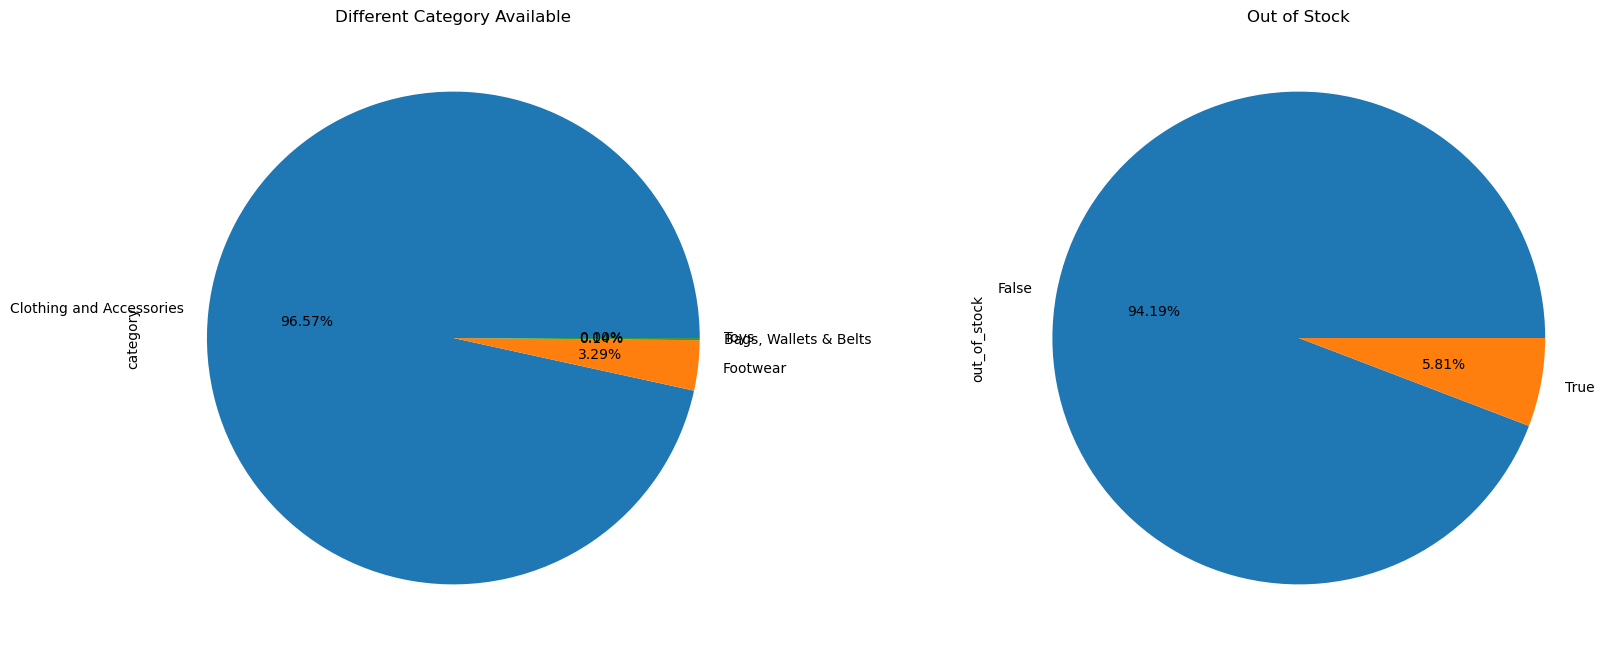

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Different Category Available')
plt.subplot(1,2,2)
df['out_of_stock'].value_counts().plot.pie(autopct='%1.2f%%')
plt.title('Out of Stock')

<Axes: ylabel='actual_price'>

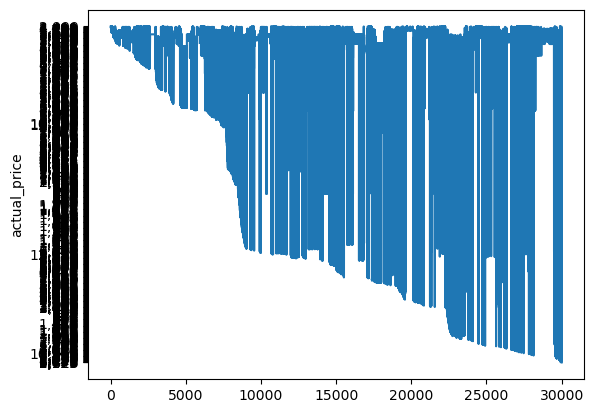

In [17]:
sns.lineplot(x=df.index,y='actual_price',data=df)